# Difference between builds

*This notebook explores the differences between the three builds*

Recall that each build contains eight 'anchors', i.e. specimen **not** included in the main study. These anchors are specimen rotated -90 degrees about the x-axis. All builds contain 45 defined positions in a 3x3x5 grid as displayed in the figure below. The anchors are found at **(2,3,z)** for all layers, and at **(3,1,z)** for layers 1, 3 and 5. This notebook explores the differences between the three builds by comparing these anchor specimen between the builds.

<img src="figs/layout_positions.png" width="600"/>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import my_functions as func
import my_plot as myplt

In [4]:
"""
Retrieve all the data and sort it into a dictionary where each entry is a separate characteristic.

Key:   Name of the characteristic.
Value: DataFrame containing the measured values and the layout data.

"""

# Initiate a dictionary with characteristics and layout information
char_dict = func.make_char_dict()

---

## Cylindricity

---

In [5]:
## Prepare data
# List of characteristics
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

for i in range(len(chars)):
    if 'char' not in char_dict[chars[i]].columns:
        char_dict[chars[i]].insert(2, 'char', chars[i])


# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

print(df.size)

df.head()

10395


,error,build,char,part_index,x_pos,y_pos,z_pos,angle,center_x,center_y,center_z
part_name,,,,,,,,,,,
Leirmo_Exp1_Build1_#1,0.091050,1,Cylindricity_Cyl_4mm_Pos,1,1,1,1,70,70,70,50.88
Leirmo_Exp1_Build1_#10,0.103505,1,Cylindricity_Cyl_4mm_Pos,10,1,1,2,20,70,70,150.60
Leirmo_Exp1_Build1_#11,0.078500,1,Cylindricity_Cyl_4mm_Pos,11,2,1,2,15,170,70,150.60
Leirmo_Exp1_Build1_#12,0.075298,1,Cylindricity_Cyl_4mm_Pos,12,3,1,2,55,270,70,150.60
Leirmo_Exp1_Build1_#13,0.103748,1,Cylindricity_Cyl_4mm_Pos,13,1,2,2,135,70,170,150.60


In [6]:
# Isolate anchors

df1 = df[(df['x_pos'] == 2) & (df['y_pos'] == 3)]

print(df1.size)

df1.head()

1155


,error,build,char,part_index,x_pos,y_pos,z_pos,angle,center_x,center_y,center_z
part_name,,,,,,,,,,,
Leirmo_Exp1_Build1_#17,0.139702,1,Cylindricity_Cyl_4mm_Pos,17,2,3,2,-90,170,270,150.60
Leirmo_Exp1_Build1_#26,0.161236,1,Cylindricity_Cyl_4mm_Pos,26,2,3,3,-90,170,270,250.32
Leirmo_Exp1_Build1_#35,0.157326,1,Cylindricity_Cyl_4mm_Pos,35,2,3,4,-90,170,270,350.04
Leirmo_Exp1_Build1_#44,0.154594,1,Cylindricity_Cyl_4mm_Pos,44,2,3,5,-90,170,270,449.76
Leirmo_Exp1_Build1_#8,0.143345,1,Cylindricity_Cyl_4mm_Pos,8,2,3,1,-90,170,270,50.88


In [7]:
# Remove redundant columns (unnecessary for final implementation)

df2 = df1.reset_index()[['char', 'build', 'z_pos', 'error']]

print(df2.size)

df2.head()

420


,char,build,z_pos,error
0,Cylindricity_Cyl_4mm_Pos,1,2,0.139702
1,Cylindricity_Cyl_4mm_Pos,1,3,0.161236
2,Cylindricity_Cyl_4mm_Pos,1,4,0.157326
3,Cylindricity_Cyl_4mm_Pos,1,5,0.154594
4,Cylindricity_Cyl_4mm_Pos,1,1,0.143345


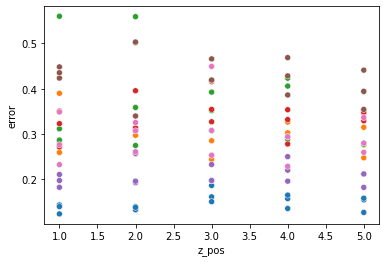

In [8]:
# Quick view on the errors of the different cylinders at different z-levels

sns.scatterplot(data=df2, x='z_pos', y='error', hue='char', legend=False)

plt.show()

In [9]:
# Create a list of dataframes - one per build

builds = [(df2[df2['build'] == i]) for i in range(1,4)]

for i in range(3):
    print(builds[i].head())

                       char  build  z_pos     error
0  Cylindricity_Cyl_4mm_Pos      1      2  0.139702
1  Cylindricity_Cyl_4mm_Pos      1      3  0.161236
2  Cylindricity_Cyl_4mm_Pos      1      4  0.157326
3  Cylindricity_Cyl_4mm_Pos      1      5  0.154594
4  Cylindricity_Cyl_4mm_Pos      1      1  0.143345
                       char  build  z_pos     error
5  Cylindricity_Cyl_4mm_Pos      2      2  0.132615
6  Cylindricity_Cyl_4mm_Pos      2      3  0.186327
7  Cylindricity_Cyl_4mm_Pos      2      4  0.135503
8  Cylindricity_Cyl_4mm_Pos      2      5  0.126883
9  Cylindricity_Cyl_4mm_Pos      2      1  0.139695
                        char  build  z_pos     error
10  Cylindricity_Cyl_4mm_Pos      3      2  0.138130
11  Cylindricity_Cyl_4mm_Pos      3      3  0.150569
12  Cylindricity_Cyl_4mm_Pos      3      4  0.165138
13  Cylindricity_Cyl_4mm_Pos      3      5  0.158322
14  Cylindricity_Cyl_4mm_Pos      3      1  0.123571


In [10]:
gb = df2.groupby(['build', 'char'])

In [11]:
gb.head()

,char,build,z_pos,error
0,Cylindricity_Cyl_4mm_Pos,1,2,0.139702
1,Cylindricity_Cyl_4mm_Pos,1,3,0.161236
2,Cylindricity_Cyl_4mm_Pos,1,4,0.157326
3,Cylindricity_Cyl_4mm_Pos,1,5,0.154594
4,Cylindricity_Cyl_4mm_Pos,1,1,0.143345
5,Cylindricity_Cyl_4mm_Pos,2,2,0.132615
6,Cylindricity_Cyl_4mm_Pos,2,3,0.186327
7,Cylindricity_Cyl_4mm_Pos,2,4,0.135503
8,Cylindricity_Cyl_4mm_Pos,2,5,0.126883
9,Cylindricity_Cyl_4mm_Pos,2,1,0.139695


In [12]:
test = gb['error'].mean().tolist()

print(test)

[0.3457128639232206, 0.20371631107748467, 0.46496858269700675, 0.3353515471026593, 0.1512402471480115, 0.30917745026473675, 0.4254020737716876, 0.35554004292061736, 0.20747438605521218, 0.4250550210013153, 0.2954386738261391, 0.14420470579815947, 0.290763130367509, 0.3270908614969771, 0.30752353076507555, 0.21569760112156242, 0.39529337657635855, 0.2597366094729722, 0.14714618093163587, 0.2674760774821588, 0.35594245311627043]


---

## Cylindricity

---

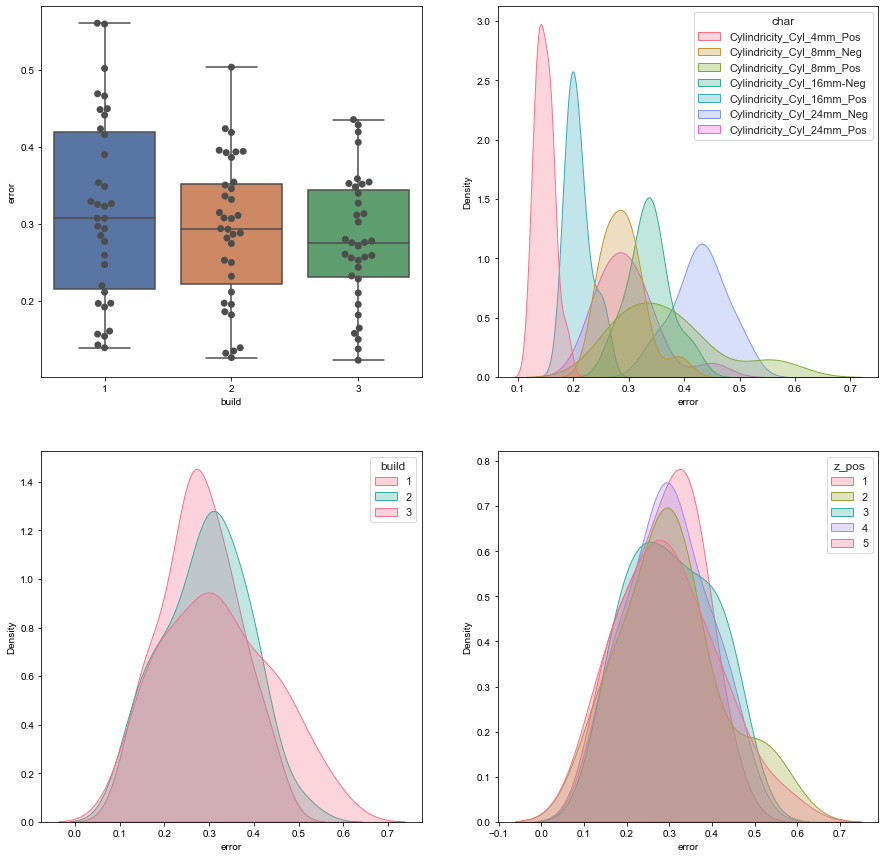

In [13]:
## Prepare data
# List of characteristics
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

# Insert a column with the name of the characteristic
for i in range(len(chars)):
    if 'char' not in char_dict[chars[i]].columns:
        char_dict[chars[i]].insert(2, 'char', chars[i])

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Isolate anchors
df = df[(df['x_pos'] == 2) & (df['y_pos'] == 3)]

# Remove redundant columns and reset index
df = df.reset_index()[['char', 'build', 'z_pos', 'error']]


## Create figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15), sharey=False)

# Set a theme
sns.set_theme(style="whitegrid")


## Plot data
# 1st plot
sns.boxplot(ax=axes[0, 0], data=df, x='build', y='error')
sns.swarmplot(ax=axes[0, 0], data=df, x='build', y='error', color='.3', size=7)

# 2nd plot
sns.kdeplot(ax=axes[0, 1], data=df, x='error', hue='char', fill=True, alpha=.3, palette="husl")

#3rd plot
sns.kdeplot(ax=axes[1, 0], data=df, x='error', hue='build', fill=True, alpha=.3, palette="husl")

#4th plot
sns.kdeplot(ax=axes[1, 1], data=df, x='error', hue='z_pos', fill=True, alpha=.3, palette="husl")

# plt.savefig('plots/Cylindricity_overview.png', dpi=300, transparent=False, bbox_inches='tight')
# Display plot
plt.show()

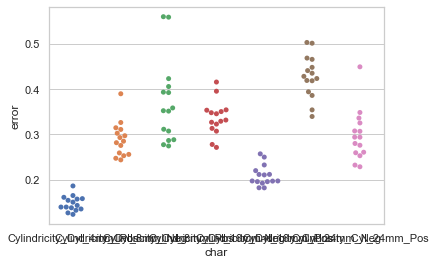

In [14]:
sns.swarmplot(data=df, y='error', x='char')


plt.show()

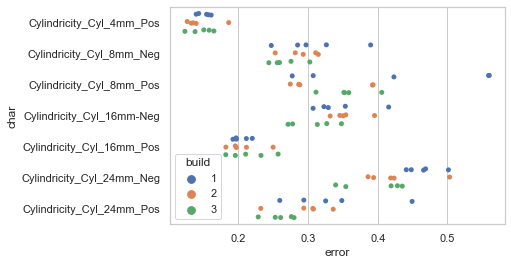

In [15]:
sns.stripplot(data=df, y='char', x='error', hue='build', dodge=True)


plt.show()

---

## Flatness

---

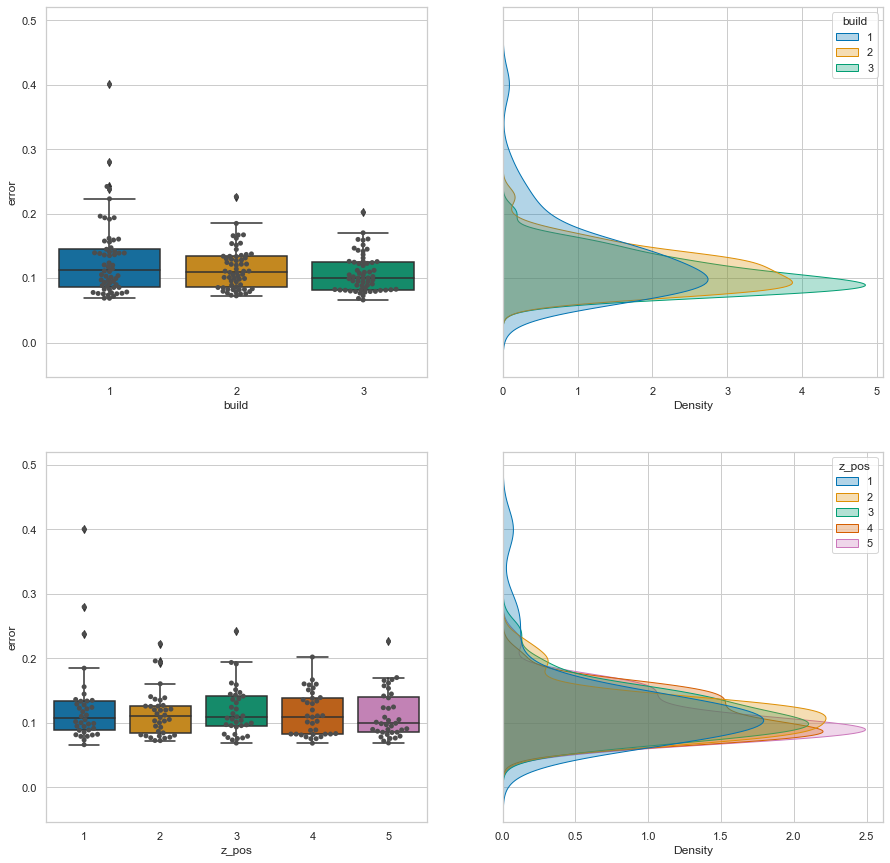

In [16]:
"""
Comparison of all planes of anchor specimen at position (2,3).

"""

## Prepare data
# List of characteristics
chars = ['Flatness_HX1_Plane1',
         'Flatness_HX1_Plane2',
         'Flatness_HX1_Plane3',
         'Flatness_HX1_Plane4',
         'Flatness_HX1_Plane5',
         'Flatness_HX1_Plane6',
         'Flatness_HX2_Plane1',
         'Flatness_HX2_Plane2',
         'Flatness_HX2_Plane3',
         'Flatness_HX2_Plane4',
         'Flatness_HX2_Plane5',
         'Flatness_HX2_Plane6']

# Insert a column with the name of the characteristic
for i in range(len(chars)):
    if 'char' not in char_dict[chars[i]].columns:
        char_dict[chars[i]].insert(2, 'char', chars[i])

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Isolate anchors
df = df[(df['x_pos'] == 2) & (df['y_pos'] == 3)]

# Remove redundant columns and reset index
df = df.reset_index()[['char', 'build', 'z_pos', 'error']]


## Create figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15), sharey=True)

# Set a theme
sns.set_theme(style="whitegrid")


## Plot data
# 1st plot
sns.boxplot(ax=axes[0, 0], data=df, x='build', y='error', palette='colorblind')
sns.swarmplot(ax=axes[0, 0], data=df, x='build', y='error', color='.3')

# 2nd plot
sns.kdeplot(ax=axes[0, 1], data=df, y='error', hue='build', fill=True, alpha=.3, palette='colorblind')

#3rd plot
#sns.stripplot(ax=axes[1, 0], data=df, y='char', x='error', hue='build', palette='colorblind')
sns.boxplot(ax=axes[1, 0], data=df, x='z_pos', y='error', palette='colorblind')
sns.swarmplot(ax=axes[1, 0], data=df, x='z_pos', y='error', color='.3')

#4th plot
sns.kdeplot(ax=axes[1, 1], data=df, y='error', hue='z_pos', fill=True, alpha=.3, palette='colorblind')


# Display plot
plt.show()

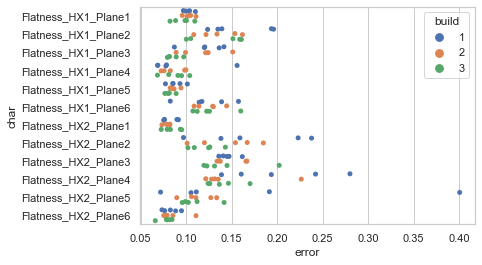

In [17]:
sns.stripplot(data=df, y='char', x='error', hue='build', dodge=True)

plt.show()

In [18]:
"""
T-test for anchors.

"""

## Prepare data
# List of characteristics
chars = ['Flatness_HX1_Plane1',
         'Flatness_HX1_Plane2',
         'Flatness_HX1_Plane3',
         'Flatness_HX1_Plane4',
         'Flatness_HX1_Plane5',
         'Flatness_HX1_Plane6',
         'Flatness_HX2_Plane1',
         'Flatness_HX2_Plane2',
         'Flatness_HX2_Plane3',
         'Flatness_HX2_Plane4',
         'Flatness_HX2_Plane5',
         'Flatness_HX2_Plane6']

# Insert a column with the name of the characteristic
for i in range(len(chars)):
    if 'char' not in char_dict[chars[i]].columns:
        char_dict[chars[i]].insert(2, 'char', chars[i])

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Isolate anchors
df = df[(df['x_pos'] == 2) & (df['y_pos'] == 3)]

# Remove redundant columns and reset index
df = df.reset_index()[['char', 'build', 'z_pos', 'error']]


## Perform T-test
p_vals = func.get_p_vals(df, 'build')


p_vals

,1,2,3
1,NaN,0.108352,0.0153064
2,0.108352,NaN,0.215064
3,0.0153064,0.215064,NaN


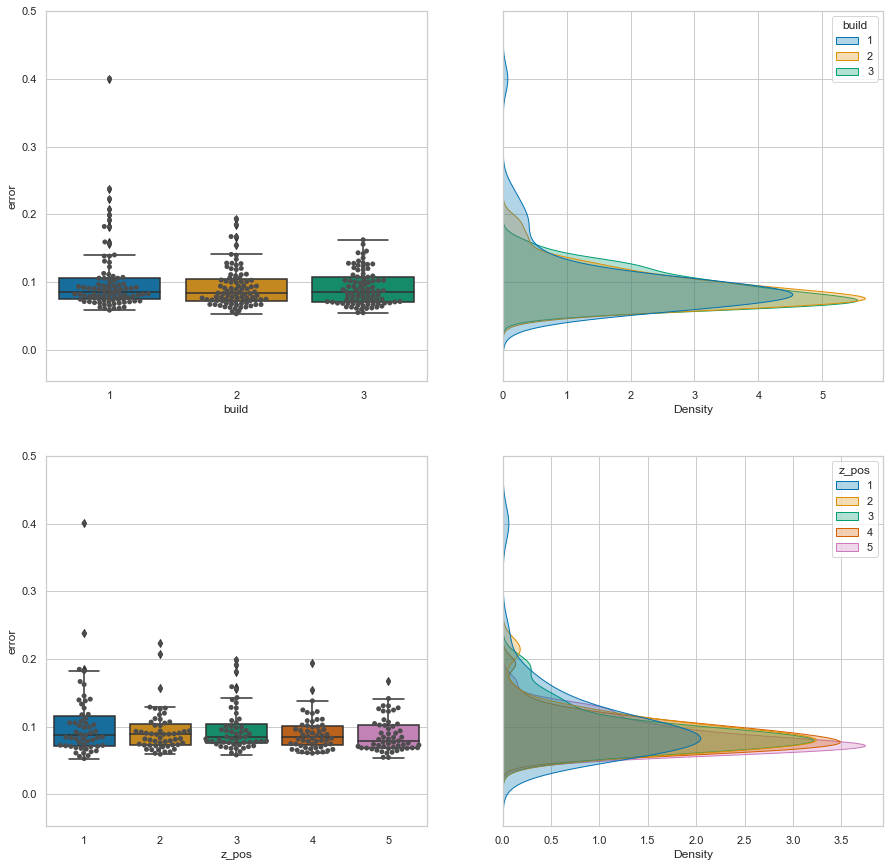

In [19]:
"""
Comparison of vertical planes of all positions

"""

## Prepare data
# List of characteristics
chars = ['Flatness_HX2_Plane2',
         'Flatness_HX2_Plane5']

# Insert a column with the name of the characteristic
for i in range(len(chars)):
    if 'char' not in char_dict[chars[i]].columns:
        char_dict[chars[i]].insert(2, 'char', chars[i])

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Isolate anchors
#df = df[(df['x_pos'] == 2) & (df['y_pos'] == 3)]

# Remove redundant columns and reset index
df = df.reset_index()[['char', 'build', 'z_pos', 'error']]


## Create figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15), sharey=True)

# Set a theme
sns.set_theme(style="whitegrid")


## Plot data
# 1st plot
sns.boxplot(ax=axes[0, 0], data=df, x='build', y='error', palette='colorblind')
sns.swarmplot(ax=axes[0, 0], data=df, x='build', y='error', color='.3')

# 2nd plot
sns.kdeplot(ax=axes[0, 1], data=df, y='error', hue='build', fill=True, alpha=.3, palette='colorblind')

#3rd plot
#sns.stripplot(ax=axes[1, 0], data=df, y='char', x='error', hue='build', palette='colorblind')
sns.boxplot(ax=axes[1, 0], data=df, x='z_pos', y='error', palette='colorblind')
sns.swarmplot(ax=axes[1, 0], data=df, x='z_pos', y='error', color='.3')

#4th plot
sns.kdeplot(ax=axes[1, 1], data=df, y='error', hue='z_pos', fill=True, alpha=.3, palette='colorblind')


#plt.savefig('plots/Vertical_flatness_overview.png', dpi=300, transparent=False, bbox_inches='tight')
# Display plot
plt.show()


In [20]:
"""
T-test for vertical planes accross builds.

"""

## Prepare data
# List of characteristics
chars = ['Flatness_HX2_Plane2']

# Insert a column with the name of the characteristic
for i in range(len(chars)):
    if 'char' not in char_dict[chars[i]].columns:
        char_dict[chars[i]].insert(2, 'char', chars[i])

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Isolate anchors
#df = df[(df['x_pos'] == 2) & (df['y_pos'] == 3)]

# Remove redundant columns and reset index
df = df.reset_index()[['char', 'build', 'z_pos', 'error']]


## Perform T-test
p_vals = func.get_p_vals(df, 'build')


p_vals

,1,2,3
1,NaN,0.836123,0.903883
2,0.836123,NaN,0.908112
3,0.903883,0.908112,NaN


In [21]:
"""
T-test for vertical planes accross builds.

"""

## Prepare data
# List of characteristics
chars = ['Flatness_HX2_Plane5']

# Insert a column with the name of the characteristic
for i in range(len(chars)):
    if 'char' not in char_dict[chars[i]].columns:
        char_dict[chars[i]].insert(2, 'char', chars[i])

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Isolate anchors
#df = df[(df['x_pos'] == 2) & (df['y_pos'] == 3)]

# Remove redundant columns and reset index
df = df.reset_index()[['char', 'build', 'z_pos', 'error']]


## Perform T-test
p_vals = func.get_p_vals(df, 'build')


p_vals

,1,2,3
1,NaN,0.0853338,0.0432164
2,0.0853338,NaN,0.654688
3,0.0432164,0.654688,NaN


---

## Vertical planes

---

In [22]:
## Prepare data
# List of characteristics
chars = ['Flatness_HX2_Plane2',
         'Flatness_HX2_Plane5']

# Define list of strings to simplify column selection
builds = ['build 1', 'build 2', 'build 3']

# Insert a column with the name of the characteristic
for i in range(len(chars)):
    if 'char' not in char_dict[chars[i]].columns:
        char_dict[chars[i]].insert(2, 'char', chars[i])

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Set and 'part index' as index and sort accordingly
df = df.set_index('part_index').sort_index()

# Split df into a list with one dataframes for each build
df_builds = [df.loc[df['build'] == i] for i in range(1, 4)]

# Rename the error column to reflect build number
for i in range(3): df_builds[i] = df_builds[i].rename(columns={'error': 'build {}'.format(i + 1)}).drop(columns=['build'])

# Concatinate the list of dataframes back into a single dataframe
df_b = pd.concat(df_builds, axis=1)

# Remove duplicate columns
df_b = df_b.loc[:,~df_b.columns.duplicated()]

# Move column for 'build 1' to the others
df_b.insert(8, 'build 1', df_b.pop('build 1'))

# Calculate mean
df_b['mean'] = df_b[builds].mean(axis=1)

# Calculate difference between minimum and maximum
df_b['diff'] = df_b[builds].max(axis=1) - df_b[builds].min(axis=1)

df_b.loc[df_b['char'] == 'Flatness_HX2_Plane2', 'char'] = 'HX2_Plane2'
df_b.loc[df_b['char'] == 'Flatness_HX2_Plane5', 'char'] = 'HX2_Plane5'

df_b.head(10)

,char,x_pos,y_pos,z_pos,angle,center_x,center_y,center_z,build 1,build 2,build 3,mean,diff
part_index,,,,,,,,,,,,,
1,HX2_Plane2,1,1,1,70,70,70,50.88,0.084595,0.105779,0.069072,0.086482,0.036706
1,HX2_Plane5,1,1,1,70,70,70,50.88,0.099434,0.118279,0.083881,0.100531,0.034397
2,HX2_Plane5,2,1,1,140,170,70,50.88,0.087820,0.062995,0.079049,0.076621,0.024826
2,HX2_Plane2,2,1,1,140,170,70,50.88,0.076693,0.052950,0.067951,0.065864,0.023742
3,HX2_Plane5,3,1,1,-90,270,70,50.88,0.071819,0.072636,0.162345,0.102267,0.090526
3,HX2_Plane2,3,1,1,-90,270,70,50.88,0.090747,0.057378,0.073944,0.074023,0.033369
4,HX2_Plane2,1,2,1,145,70,170,50.88,0.088876,0.070989,0.127601,0.095822,0.056612
4,HX2_Plane5,1,2,1,145,70,170,50.88,0.181935,0.072349,0.092087,0.115457,0.109587
5,HX2_Plane2,2,2,1,165,170,170,50.88,0.061222,0.056199,0.085149,0.067523,0.028949


<AxesSubplot:xlabel='char', ylabel='diff'>

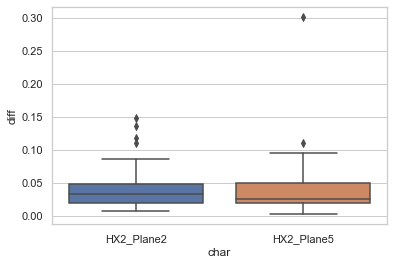

In [23]:
sns.boxplot(data=df_b, x='char', y='diff')

In [24]:
df_b[['build 1', 'build 2', 'build 3', 'mean', 'diff']].describe()

,build 1,build 2,build 3,mean,diff
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.100579,0.091916,0.091149,0.094548,0.040117
std,0.049281,0.028711,0.025326,0.026291,0.040889
min,0.058330,0.052950,0.054538,0.065753,0.002214
25%,0.074281,0.072488,0.070237,0.075634,0.019272
50%,0.084530,0.083260,0.085130,0.086795,0.027337
75%,0.105167,0.103796,0.107094,0.103580,0.049757
max,0.400476,0.193571,0.162345,0.211045,0.301388


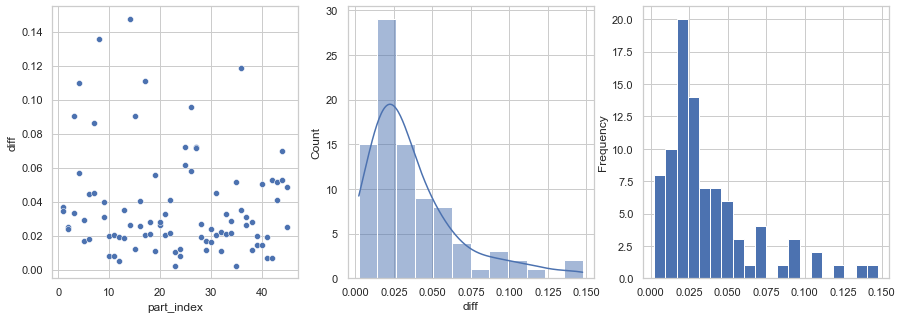

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

df_1 = df_b[df_b['diff'] < df_b['diff'].max()]

data = df_1['diff']

sns.scatterplot(ax=ax[0], data=data)
sns.histplot(ax=ax[1], data=data, kde=True)
ax[2] = data.plot.hist(bins=20)

In [26]:
## Define function for retrieving the frozen distribution
#  Valid distribution include lognorm, invgamma and powerlognorm
def calc_pdf(x, data):
    return stats.lognorm.pdf(x, *stats.lognorm.fit(data))

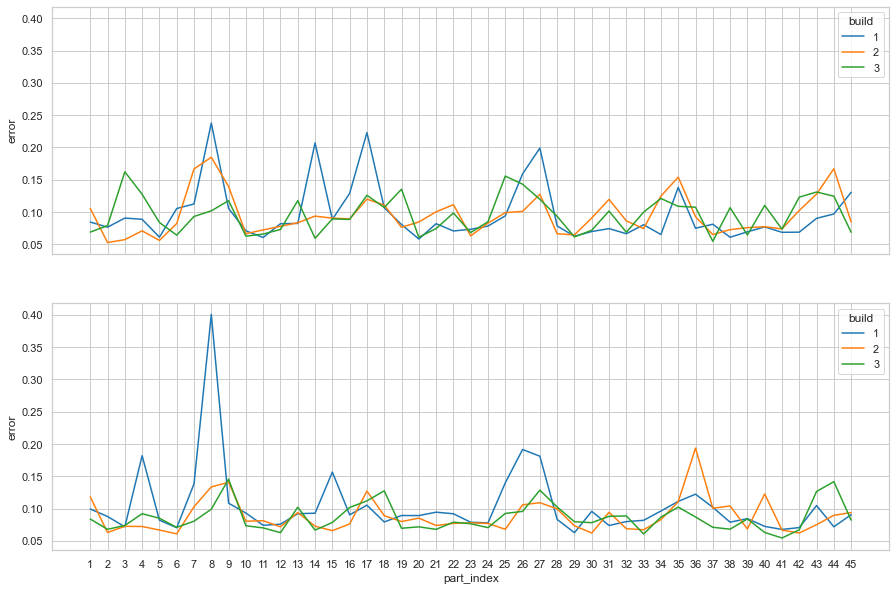

In [42]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), sharex=True, sharey=True)

sns.lineplot(data=df[df['char'] == 'Flatness_HX2_Plane2'], x='part_index', y='error', hue='build', ax=axs[0], palette='tab10')


# sns.scatterplot(data=df_b[df_b['char'] == 'HX2_Plane2'], x='part_index', y='build 1', ax=axs[0])
# sns.scatterplot(data=df_b[df_b['char'] == 'HX2_Plane2'], x='part_index', y='build 2', ax=axs[0])
# sns.scatterplot(data=df_b[df_b['char'] == 'HX2_Plane2'], x='part_index', y='build 3', ax=axs[0])
# sns.lineplot(data=df_b[df_b['char'] == 'HX2_Plane2'], x='part_index', y='mean', color='lime', ax=axs[0])

axs[0].set_xticks(np.linspace(1, 45, 45))


sns.lineplot(data=df[df['char'] == 'Flatness_HX2_Plane5'], x='part_index', y='error', hue='build', ax=axs[1], palette='tab10')

# sns.scatterplot(data=df_b[df_b['char'] == 'HX2_Plane5'], x='part_index', y='build 1', ax=axs[1])
# sns.scatterplot(data=df_b[df_b['char'] == 'HX2_Plane5'], x='part_index', y='build 2', ax=axs[1])
# sns.scatterplot(data=df_b[df_b['char'] == 'HX2_Plane5'], x='part_index', y='build 3', ax=axs[1])
# sns.lineplot(data=df_b[df_b['char'] == 'HX2_Plane5'], x='part_index', y='mean', color='lime', ax=axs[1])

axs[1].set_xticks(np.linspace(1, 45, 45))

plt.show()

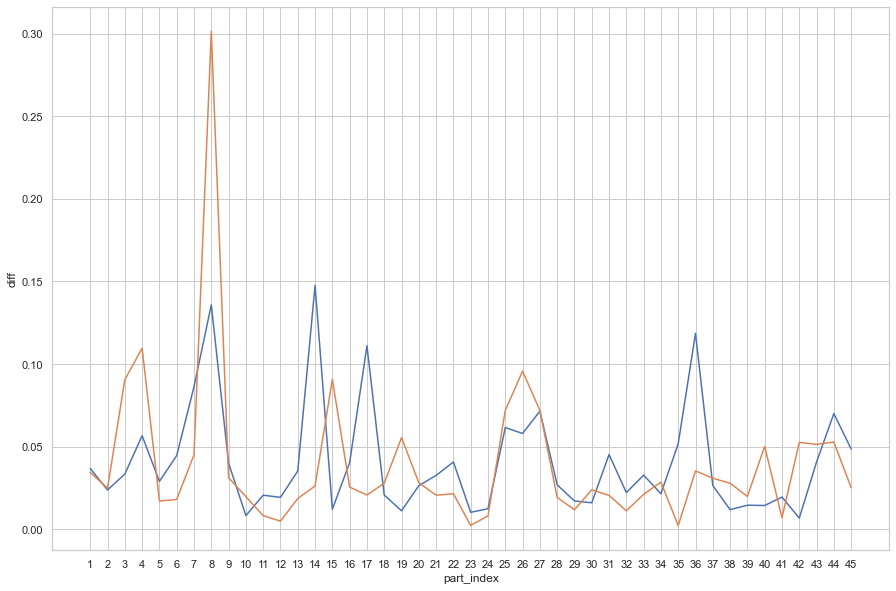

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 10), sharex=True, sharey=True)


sns.lineplot(data=df_b[df_b['char'] == 'HX2_Plane2'], x='part_index', y='diff', ax=axs)
sns.lineplot(data=df_b[df_b['char'] == 'HX2_Plane5'], x='part_index', y='diff', ax=axs)


axs.set_xticks(np.linspace(1, 45, 45))

plt.show()

<AxesSubplot:xlabel='x_pos', ylabel='mean'>

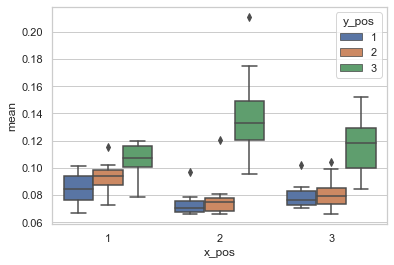

In [29]:
sns.boxplot(data=df_b, x='x_pos', y='mean', hue='y_pos')

In [30]:
df.head()

,error,build,char,x_pos,y_pos,z_pos,angle,center_x,center_y,center_z
part_index,,,,,,,,,,
1,0.084595,1,Flatness_HX2_Plane2,1,1,1,70,70,70,50.88
1,0.105779,2,Flatness_HX2_Plane2,1,1,1,85,70,70,50.88
1,0.069072,3,Flatness_HX2_Plane2,1,1,1,165,70,70,50.88
1,0.099434,1,Flatness_HX2_Plane5,1,1,1,70,70,70,50.88
1,0.118279,2,Flatness_HX2_Plane5,1,1,1,85,70,70,50.88


<AxesSubplot:xlabel='char', ylabel='error'>

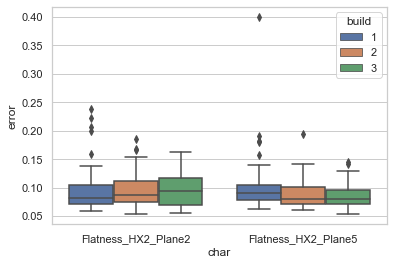

In [31]:
sns.boxplot(data=df, x='char', y='error', hue='build')

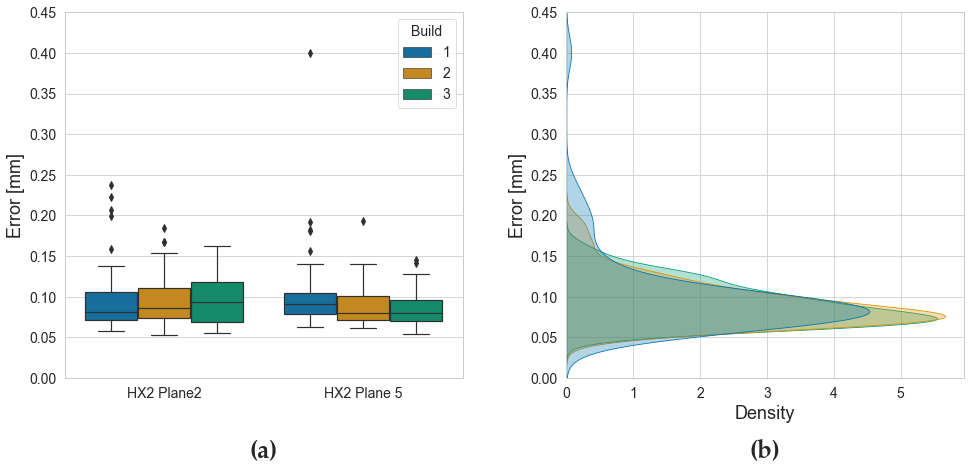

In [107]:
# Seaborn theme
sns.set_theme(context='paper', style='whitegrid')

# Definition for font size
large = 24
medium = 18
small = 14
x_small = 12

# Define font
pfont = {'fontname':'Palatino Linotype'}

# Initialize figure
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,7.5))

# Configure layout spacing
fig.tight_layout(pad=8.0)

# Set context with Seaborn
sns.set_context('paper', font_scale=1.2)


## PLOT 1
# Boxplot for the first frame
sns.boxplot(ax=axs[0], data=df, x='char', y='error', hue='build', palette='colorblind')

# Place legend in upper right corner
axs[0].legend(loc='upper right', title="Build", title_fontsize=small, fontsize=small, fancybox=True, markerscale=2)

# Set label for the x-axis
axs[0].set_xlabel(None)

# Edit the text for the groups of boxplots
axs[0].set_xticklabels(["HX2 Plane2", "HX2 Plane 5"])

# Add letter below plot
plt.text(x=0.5, y=-0.2, s="(a)", fontsize=large, weight='bold', **pfont,
         horizontalalignment='center',
         verticalalignment='center',
         transform=axs[0].transAxes)


## PLOT 2
# Kernel density estimation for second frame
sns.kdeplot(ax=axs[1], data=df, y='error', hue='build', fill=True, alpha=.3, palette='colorblind', legend=False)

# Set the label for the x-axis
axs[1].set_xlabel("Density", fontsize=medium)

# Add letter below plot
plt.text(x=0.5, y=-0.2, s="(b)", fontsize=large, weight='bold', **pfont,
         horizontalalignment='center',
         verticalalignment='center',
         transform=axs[1].transAxes)


for ax in axs:
    # Set label for y-axis
    ax.set_ylabel("Error [mm]", fontsize=medium)
    
    # Set the label size for both axes
    ax.tick_params(labelsize=small)
    
    # Set the limits of the y-axis
    ax.set_ylim(ymin=0, ymax=0.45)

    
# plt.savefig("plots/40.0_Variation_between_builds_for_vertical_planes.jpg", dpi=300, bbox_inches='tight')

    
## Display plot
plt.show()